# Overview

This notebook shows how to train and test a neural network on the BELLA data.

In order to run this notebook, you need to produce first produce CSV files for the training and testing data. (See the folder `experimental data`.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import transformer
import torch
from Neural_Net_Classes import NN as NN

<h2>Loading Split Data</h2>

In [2]:
# Load the CSV file
sim_training_set_df = pd.read_csv('simulation_data.csv')



<h2>Visualizing Split Datasets</h2>

<Figure size 640x480 with 0 Axes>

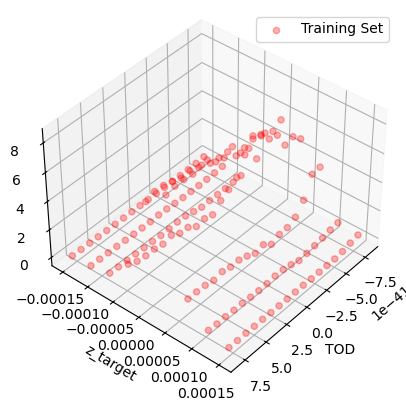

In [3]:
# Access the arrays
sim_z_training_set = sim_training_set_df['z_target (m)'].values
sim_TOD_training_set = sim_training_set_df['TOD (s^3)'].values
sim_protons_training_set = sim_training_set_df['n_protons (1/sr)'].values

plt.clf()
ax = plt.figure().add_subplot(projection='3d')

ax.scatter( sim_TOD_training_set, sim_z_training_set, sim_protons_training_set, c='r',alpha=0.3, label='Training Set')
#ax.scatter( TOD_test_set, z_test_set,protons_test_set, c='b', alpha=0.3, label='Testing Set')
ax.view_init(elev=40., azim=40)
plt.xlabel('TOD')
plt.ylabel('z_target')
plt.legend()

<h2>Normalizing Data</h2>

In [6]:
#Setting Bounds
# z_bounds = torch.tensor([-150e-6, 150e-6])
# TOD_bounds = torch.tensor([-80e-41, 80e-41])
# protons_bounds = torch.tensor([7e7, 1e11])

#define transformers
sim_transformer_z = transformer.Transformer(sim_z_training_set, transform_type = 'standardize')
sim_transformer_TOD = transformer.Transformer(sim_TOD_training_set, transform_type = 'standardize')
sim_transformer_protons = transformer.Transformer(sim_protons_training_set, transform_type = 'standardize')

#Full normalization process
def normalization(array, transformer):
    array = np.array(array).reshape(-1,1)
    array = torch.tensor(array)
    norm = transformer.forward(array)
    return norm


AssertionError: 

In [ ]:
X = torch.

In [5]:
#Normalize datasets 1
norm_sim_z_train_set = normalization(sim_z_training_set, sim_transformer_z)
norm_sim_TOD_train_set = normalization(sim_TOD_training_set, sim_transformer_TOD)
norm_sim_protons_train_set = normalization(sim_protons_training_set, sim_transformer_protons)


<h2>Visualizing Normalized Data</h2>

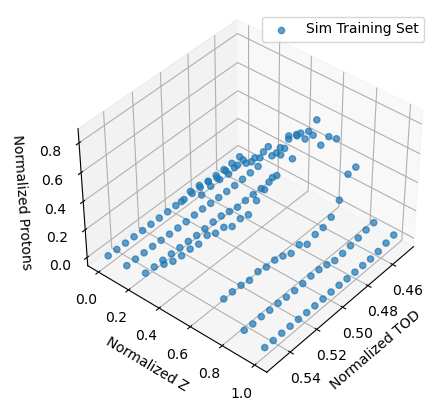

In [6]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training set
ax.scatter(norm_sim_TOD_train_set, norm_sim_z_train_set, norm_sim_protons_train_set, label='Sim Training Set', alpha=0.7)
# Scatter plot for testing set
#ax.scatter(norm_TOD_test_set, norm_z_test_set, norm_protons_test_set, label='Test Set', alpha=0.7)
ax.view_init(elev=40., azim=40)
# Set labels and title
ax.set_xlabel('Normalized TOD')
ax.set_ylabel('Normalized Z')
ax.set_zlabel('Normalized Protons')

# Add legend
ax.legend()
# Show plot
plt.show()

<h1>Neural Network Framework</h1>

<h2>Build and Train Neural Networks</h2>

Epoch [1000/10000], Loss:0.004936
Epoch [2000/10000], Loss:0.002264
Epoch [3000/10000], Loss:0.001894
Epoch [4000/10000], Loss:0.001638
Epoch [5000/10000], Loss:0.001452
Epoch [6000/10000], Loss:0.001298
Epoch [7000/10000], Loss:0.001214
Epoch [8000/10000], Loss:0.001155
Epoch [9000/10000], Loss:0.001075
Epoch [10000/10000], Loss:0.000968


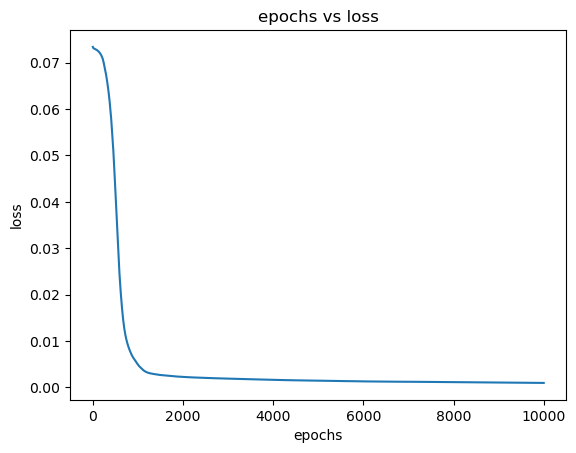

In [7]:
sim_net = NN()
sim_net.train_model(norm_sim_z_train_set, norm_sim_TOD_train_set, norm_sim_protons_train_set,num_epochs=10000)
sim_net.plot_loss()
#net.test_model(norm_z_test_set, norm_TOD_test_set, norm_protons_test_set)

In [8]:
train_predictions = sim_net.predict(norm_sim_z_train_set, norm_sim_TOD_train_set)
#test_predictions = net.predict(norm_z_test_set, norm_TOD_test_set)

<h2>Plotting Predictions</h2>

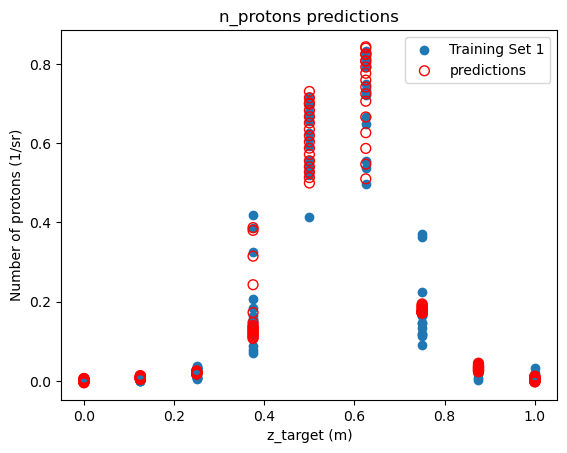

In [9]:
fig, ax = plt.subplots()

ax.scatter(norm_sim_z_train_set, norm_sim_protons_train_set, label='Training Set 1')
#ax.scatter(norm_z_test_set, norm_protons_test_set, label='Test Set 1')

ax.scatter(train_predictions['Z_target'], train_predictions['predictions'], label='predictions', s=50, facecolors='none', edgecolors='r')
#ax.scatter(test_predictions['Z_target'], test_predictions['predictions'], s=50, facecolors='none', edgecolors='r')

plt.title("n_protons predictions")
plt.xlabel('z_target (m)')
plt.ylabel('Number of protons (1/sr)')
plt.legend()

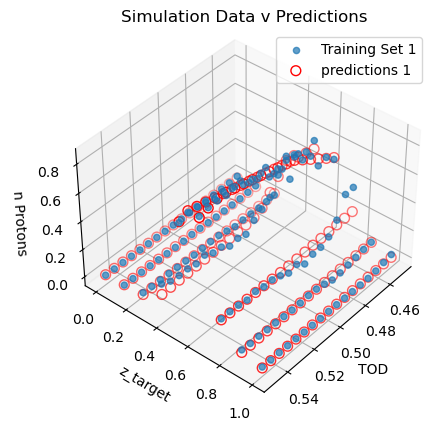

In [10]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training set
ax.scatter(norm_sim_TOD_train_set, norm_sim_z_train_set, norm_sim_protons_train_set, label='Training Set 1', alpha=0.7)
#ax.scatter(norm_TOD_test_set, norm_z_test_set, norm_protons_test_set, label='Test Set 1', alpha=0.7)

ax.scatter(train_predictions['TOD'], train_predictions['Z_target'], train_predictions['predictions'], label='predictions 1', s=50, facecolors='none', edgecolors='r')
#ax.scatter(test_predictions['TOD'], test_predictions['Z_target'], test_predictions['predictions'], s=50, facecolors='none', edgecolors='r')

ax.view_init(elev=40., azim=40)
# Set labels and title
ax.set_title('Simulation Data v Predictions')
ax.set_xlabel('TOD')
ax.set_ylabel('z_target')
ax.set_zlabel('n Protons')

# Add legend
ax.legend()
# Show plot
plt.show()

In [23]:

class finetune_NN(NN):
    def __init__(self, base_model, hidden_size=20, 
                 learning_rate=0.0001, patience=100, factor=0.5, threshold=1e-4):
        super(finetune_NN, self).__init__(hidden_size, learning_rate, patience, factor, threshold)
        
        # Copying weights from base_model to this model
        self.w0 = torch.nn.Parameter(torch.rand(1))
        self.b0 = torch.nn.Parameter(torch.rand(1))
        self.w1 = torch.nn.Parameter(torch.rand(1))
        self.b1 = torch.nn.Parameter(torch.rand(1))
        #self.hidden0 = nn.Linear(1, 1)
        self.hidden1.load_state_dict(base_model.hidden1.state_dict())
        self.hidden2.load_state_dict(base_model.hidden2.state_dict())
        self.hidden3.load_state_dict(base_model.hidden3.state_dict())
        self.hidden4.load_state_dict(base_model.hidden4.state_dict())
        self.hidden5.load_state_dict(base_model.hidden5.state_dict())        
        self.output.load_state_dict(base_model.output.state_dict())
        self.w2 =torch.nn.Parameter(torch.rand(1))
        self.b2 = torch.nn.Parameter(torch.rand(1))
        self.relu = nn.ReLU()
        #self.linear = nn.Linear(1,20)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        self.scheduler = ReduceLROnPlateau(self.optimizer, 'min', 
                                           factor=factor, patience=patience, threshold=threshold)
        
    def forward(self, x):
        # print("shape(x)",x.shape)
        # print("shapex0",x[:,0].shape)
        # print("shape1",x[:,1].shape)
        print("in forward")
        w_param = [self.w0,self.w1]
        b_param = [self.b0,self.b1]
        #print("wparam",w_param)
        #print("bparam",b_param)
        x = x*torch.tensor( w_param ) + torch.tensor(b_param)
        #x_test2 = x[:,0]*self.w0 + self.b0
        #print(x_test1[350,0])
        #print(x_test2[350])
        
        # x1[:,0] = x[:,0]*self.w0 + self.b0
        # x1[:,1] = x[:,1]*self.w1 + self.b1

        # print("shape(x)",x1.shape)
        # print("shapex0",x1[:,0].shape)
        # print("shape1",x1[:,1].shape)        
        #x = self.linear(self.hidden0(x))
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.relu(self.hidden4(x))
        x = self.relu(self.hidden5(x))
        x = self.output(x)
        print("out shape",x.shape)
        x = x * self.w2 + self.b2
        #print(len(x))
        # linear transform of output
        
        return x
    
    def train_model(self, x_train, y_train, z_train, num_epochs=1500):
        #print(self.parameters())
        for param in self.hidden1.parameters():
            param.requires_grad = False
        for param in self.hidden2.parameters():
            param.requires_grad = False
        for param in self.hidden3.parameters():
            param.requires_grad = False
        for param in self.hidden4.parameters():
            param.requires_grad = False
        for param in self.hidden5.parameters():
            param.requires_grad = False
        for param in self.output.parameters():
            param.requires_grad = False           
  
        x_train = x_train.to(torch.float32)
        y_train = y_train.to(torch.float32)
        z_train = z_train.to(torch.float32)
        
        inputs = torch.cat((x_train, y_train), dim=1).to(torch.float32)
        # print("len xtrain", len(x_train))
        # print("len ytrain", len(y_train))
        # print("len ztrain", len(z_train))
        # print("input shape",inputs.shape)
        self.train()
        for epoch in range(num_epochs):
            self.optimizer.zero_grad()

            outputs = self(inputs)
            print("len output",len(outputs))
            loss = self.criterion(outputs, z_train)
            loss.backward()
            torch.autograd.set_detect_anomaly(True)            
            self.optimizer.step()

            current_loss = loss.item()
            self.loss_data['loss'].append(current_loss)
            self.loss_data['epoch_count'].append(epoch)
            self.scheduler.step(current_loss)

            if (epoch + 1) % (num_epochs/1000) == 0:
                print(f'Comb NN: Epoch [{epoch+1}/{num_epochs}], Loss:{loss.item():.6f}')
                #print("w0,b0",self.w0, self.b0)
                #print("w1,b1",self.w1, self.b1)
                print("w2,b2",self.w2,self.b2)

    def predict(self, x_values, y_values):
        '''
        args:
            tensor x_values
            tensor y_values
        returns:
            numpy array with predictions
        '''
        predictions = {
        'Z_target': x_values.tolist(),
        'TOD': y_values.tolist(),
        'predictions': []
        }
    
        inputs = torch.cat((x_values, y_values), dim=1).to(torch.float32)
        self.eval()
        with torch.no_grad():
            output = self(inputs)
            predictions['predictions'] = output.detach().numpy().tolist()
    
        return predictions


In [24]:
# Load the CSV file
expt_training_set_df = pd.read_csv('expt_training_set_1.csv')

# Access the arrays
expt_z_training_set = expt_training_set_df['z_target (m)'].values
expt_TOD_training_set = expt_training_set_df['TOD (s^3)'].values
expt_protons_training_set = expt_training_set_df['n_protons (1/sr)'].values

In [25]:
# Load the CSV file
expt_test_set_df = pd.read_csv('expt_test_set_1.csv')

# Access the arrays
expt_z_test_set = expt_test_set_df['z_target (m)'].values
expt_TOD_test_set = expt_test_set_df['TOD (s^3)'].values
expt_protons_test_set = expt_test_set_df['n_protons (1/sr)'].values

In [26]:
#Setting Bounds


#define transformers
expt_transformer_z = transformer.Transformer(z_bounds.reshape(2,1), transform_type = 'normalize')
expt_transformer_TOD = transformer.Transformer(TOD_bounds.reshape(2,1), transform_type = 'normalize')
expt_transformer_protons = transformer.Transformer(protons_bounds.reshape(2,1), transform_type = 'normalize')

#Full normalization process
def normalization(array, transformer):
    array = np.array(array).reshape(-1,1)
    array = torch.tensor(array)
    norm = transformer.forward(array)
    return norm

In [27]:
#Normalize datasets 1
expt_norm_z_train_set = normalization(expt_z_training_set, expt_transformer_z)
expt_norm_TOD_train_set = normalization(expt_TOD_training_set, expt_transformer_TOD)
expt_norm_protons_train_set = normalization(expt_protons_training_set, expt_transformer_protons)
expt_norm_z_test_set = normalization(expt_z_test_set, expt_transformer_z)
expt_norm_TOD_test_set = normalization(expt_TOD_test_set, expt_transformer_TOD)
expt_norm_protons_test_set = normalization(expt_protons_test_set, expt_transformer_protons)

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn.functional as F
torch.autograd.set_detect_anomaly(True)

finetune_net = finetune_NN(sim_net)
finetune_net.train_model(expt_norm_z_train_set,expt_norm_TOD_train_set,expt_norm_protons_train_set,num_epochs=10000)


in forward
tensor(0.3933)
tensor(0.3933, grad_fn=<SelectBackward0>)
out shape torch.Size([379, 1])
len output 379
in forward
tensor(0.3933)
tensor(0.3933, grad_fn=<SelectBackward0>)
out shape torch.Size([379, 1])
len output 379
in forward
tensor(0.3933)
tensor(0.3933, grad_fn=<SelectBackward0>)
out shape torch.Size([379, 1])
len output 379
in forward
tensor(0.3933)
tensor(0.3933, grad_fn=<SelectBackward0>)
out shape torch.Size([379, 1])
len output 379
in forward
tensor(0.3933)
tensor(0.3933, grad_fn=<SelectBackward0>)
out shape torch.Size([379, 1])
len output 379
in forward
tensor(0.3933)
tensor(0.3933, grad_fn=<SelectBackward0>)
out shape torch.Size([379, 1])
len output 379
in forward
tensor(0.3933)
tensor(0.3933, grad_fn=<SelectBackward0>)
out shape torch.Size([379, 1])
len output 379
in forward
tensor(0.3933)
tensor(0.3933, grad_fn=<SelectBackward0>)
out shape torch.Size([379, 1])
len output 379
in forward
tensor(0.3933)
tensor(0.3933, grad_fn=<SelectBackward0>)
out shape torch.Size

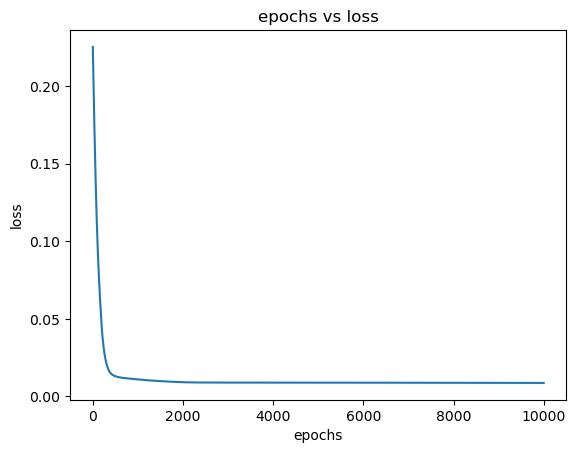

w0 tensor([0.5091])
b0 tensor([0.5577])
w1 tensor([0.6335])
b1 tensor([0.7291])
w2 tensor([0.4054])
b2 tensor([0.2687])
hidden4.weight tensor([[-0.1169, -0.0934, -0.1377,  0.0136, -0.0406,  0.2226,  0.2553, -0.2897,
          0.5064, -0.1425,  0.0013,  0.1773, -0.1500,  0.1102, -0.2211,  0.0724,
          0.3742,  0.1609,  0.1241,  0.1508],
        [-0.2154,  0.0138, -0.1976, -0.2145,  0.2940, -0.2143, -0.2126,  0.4549,
         -0.5861, -0.1615,  0.1810, -0.0698,  0.0191,  0.0831,  0.2584,  0.1490,
         -0.5333, -0.0395,  0.2297,  0.0907],
        [-0.1388, -0.1400,  0.0048, -0.1855,  0.1956, -0.1513,  0.0189, -0.0109,
          0.1857,  0.1563,  0.1653, -0.1539,  0.1118,  0.1353, -0.2213, -0.1407,
          0.0284, -0.1287, -0.1285, -0.0104],
        [-0.0906,  0.0325, -0.0965, -0.0392, -0.1621,  0.0585,  0.0976, -0.2131,
          0.0428, -0.1517, -0.0875,  0.1556, -0.0915,  0.1470,  0.0368,  0.0810,
          0.0152,  0.0427,  0.0657,  0.2057],
        [-0.2187, -0.1901, -0.213

In [48]:
finetune_net.plot_loss()
for name, param in finetune_net.named_parameters():
    if param.requires_grad:
        print(name, param.data)


In [52]:
finetune_net_pred_expt_test = finetune_net.predict(expt_norm_z_test_set,expt_norm_TOD_test_set)

in forward
wparam [Parameter containing:
tensor([0.5091], requires_grad=True), Parameter containing:
tensor([0.6335], requires_grad=True)]
bparam [Parameter containing:
tensor([0.5577], requires_grad=True), Parameter containing:
tensor([0.7291], requires_grad=True)]
out shape torch.Size([30, 1])


In [53]:
finetune_net_pred = finetune_net.predict(expt_norm_z_train_set,expt_norm_TOD_train_set)

in forward
wparam [Parameter containing:
tensor([0.5091], requires_grad=True), Parameter containing:
tensor([0.6335], requires_grad=True)]
bparam [Parameter containing:
tensor([0.5577], requires_grad=True), Parameter containing:
tensor([0.7291], requires_grad=True)]
out shape torch.Size([379, 1])


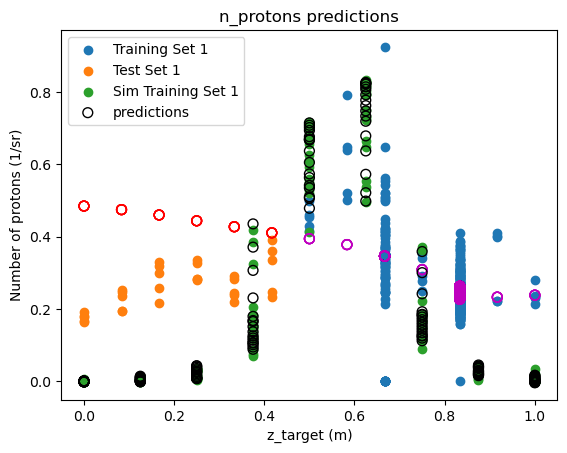

In [56]:
fig, ax = plt.subplots()

ax.scatter(expt_norm_z_train_set, expt_norm_protons_train_set, label='Training Set 1')
ax.scatter(expt_norm_z_test_set, expt_norm_protons_test_set, label='Test Set 1')
ax.scatter(norm_sim_z_train_set, norm_sim_protons_train_set, label='Sim Training Set 1')

#ax.scatter(train_predictions['Z_target'], train_predictions['predictions'], label='predictions', s=50, facecolors='none', edgecolors='r')
ax.scatter(finetune_net_pred['Z_target'], finetune_net_pred['predictions'], s=50, facecolors='none', edgecolors='m')
ax.scatter(finetune_net_pred_expt_test['Z_target'], finetune_net_pred_expt_test['predictions'], s=50, facecolors='none', edgecolors='r')
ax.scatter(train_predictions['Z_target'], train_predictions['predictions'], label='predictions', s=50, facecolors='none', edgecolors='k')
plt.title("n_protons predictions")
plt.xlabel('z_target (m)')
plt.ylabel('Number of protons (1/sr)')
plt.legend()

In [106]:
len(finetune_net_pred_expt_test['Z_target'])

30

In [107]:
len(finetune_net_pred_expt_test['predictions'])

30